In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

In [24]:
# Read file
icfes = pd.read_csv("./data/icfes.csv", low_memory=False, encoding="utf-8")

print(icfes.shape)
print(len(icfes))
icfes.head()

(559253, 81)
559253


,COLE_AREA_UBICACION,COLE_BILINGUE,COLE_CALENDARIO,COLE_CARACTER,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_DEPTO_UBICACION,COLE_COD_MCPIO_UBICACION,COLE_DEPTO_UBICACION,...,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_SOCIALES_CIUDADANAS,PERIODO,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS
0,URBANO,N,B,TÉCNICO/ACADÉMICO,17228,376001000314,376001000314,76,76001,VALLE,...,15,4,1,20171,35,177,45,44,31,28
1,URBANO,NaN,B,NaN,663120,319001005240,319001005240,19,19001,CAUCA,...,78,62,85,20171,66,326,55,67,61,70
2,URBANO,S,B,ACADÉMICO,16741,376001001221,376001001221,76,76001,VALLE,...,91,99,76,20171,70,378,100,72,86,66
3,URBANO,S,B,ACADÉMICO,16741,376001001221,376001001221,76,76001,VALLE,...,96,96,100,20171,72,389,85,75,79,83
4,URBANO,S,B,ACADÉMICO,16741,376001001221,376001001221,76,76001,VALLE,...,38,35,63,20171,52,281,80,54,50,61


In [25]:
# Drop ID columns
icfes = icfes.drop(columns=['ESTU_ESTUDIANTE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_CONSECUTIVO',
                            'COLE_CODIGO_ICFES', 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_NOMBRE_SEDE', 
                    'COLE_COD_MCPIO_UBICACION', 
                    'COLE_COD_DEPTO_UBICACION', 'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION',
                   'COLE_COD_DANE_ESTABLECIMIENTO', 'COLE_COD_DANE_SEDE'])

In [26]:
# Drop records without socioeconomic data
icfes = icfes.dropna(axis=0, how='all', subset=['FAMI_ESTRATOVIVIENDA','FAMI_TIENECOMPUTADOR',
                                                 'FAMI_TIENELAVADORA','FAMI_TIENEHORNOMICROOGAS',
                                                'FAMI_TIENEAUTOMOVIL'])

# Verify the dropping
icfes3 = icfes.loc[icfes['FAMI_ESTRATOVIVIENDA'].isnull() 
           & icfes['FAMI_TIENECOMPUTADOR'].isnull() 
           & icfes['FAMI_TIENELAVADORA'].isnull() 
           & icfes['FAMI_TIENEHORNOMICROOGAS'].isnull() 
           & icfes['FAMI_TIENEAUTOMOVIL'].isnull()]

icfes3[['FAMI_ESTRATOVIVIENDA','FAMI_TIENECOMPUTADOR',
        'FAMI_TIENELAVADORA','FAMI_TIENEHORNOMICROOGAS','FAMI_TIENEAUTOMOVIL']]

,FAMI_ESTRATOVIVIENDA,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL


In [27]:
# Use the same value for equivalent values
edu_dict = {"No Sabe":"No sabe", 
            "Primaria Completa": 'Primaria completa', 
            "Primaria Incompleta": 'Primaria incompleta',
            "Secundaria(Bachillerato) Incompleta": 'Secundaria (Bachillerato) incompleta', 
            "Secundaria(Bachillerato) Completa": 'Secundaria (Bachillerato) completa', 
            "Educación Técnica o Tecnológica Completa": 'Técnica o tecnológica completa', 
            "Educación Técnica o Tecnológica Incompleta": 'Técnica o tecnológica incompleta', 
            "Educación Profesional Incompleta": 'Educación profesional incompleta', 
            "Educación Profesional Completa": 'Educación profesional completa'}


icfes['FAMI_EDUCACIONPADRE'] = icfes['FAMI_EDUCACIONPADRE'].replace(to_replace=edu_dict)
icfes['FAMI_EDUCACIONMADRE'] = icfes['FAMI_EDUCACIONMADRE'].replace(to_replace=edu_dict)

icfes['ESTU_ETNIA'] = icfes['ESTU_ETNIA'].replace(
    to_replace={"Comunidad Rom (gitana)": "Comunidades Rom (Gitanas)"})

icfes['ESTU_HORASSEMANATRABAJA'] = icfes['ESTU_HORASSEMANATRABAJA'].replace(
    to_replace={"0": "No trabaja"})

icfes['FAMI_CUARTOSHOGAR'] = icfes['FAMI_CUARTOSHOGAR'].replace(
    to_replace={"1": "Uno",
               "2": "Dos",
               "3": "Tres",
               "4": "Cuatro",
               "5": "Cinco",})

In [28]:
# Fix capitalization
def capitalize(df, columns):
    for c in columns:
        df[c] = df[c].str.capitalize()

columns = ['ESTU_TIENEETNIA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR']

capitalize(icfes, columns)

In [29]:
# Drop 90% > missing values
icfes = icfes.drop(columns=['FAMI_TIENEINTERNET'])

# Fill Missing values
icfes['ESTU_ETNIA'] = icfes['ESTU_ETNIA'].fillna('Ninguno')
icfes['ESTU_TIENEETNIA'] = icfes['ESTU_TIENEETNIA'].fillna('No')

#14094 4%
icfes['FAMI_EDUCACIONPADRE'] = icfes['FAMI_EDUCACIONPADRE'].fillna('No responde')
#14082 4%
icfes['FAMI_EDUCACIONMADRE'] = icfes['FAMI_EDUCACIONMADRE'].fillna('No responde')
#16023 4%
icfes['FAMI_ESTRATOVIVIENDA'] = icfes['FAMI_ESTRATOVIVIENDA'].fillna('No responde')
#16328 4%
icfes['FAMI_TIENESERVICIOTV'] = icfes['FAMI_TIENESERVICIOTV'].fillna('No responde')
#14600 4%
icfes['FAMI_NUMLIBROS'] = icfes['FAMI_NUMLIBROS'].fillna('No responde')
#14779 4%
icfes['FAMI_COMELECHEDERIVADOS'] = icfes['FAMI_COMELECHEDERIVADOS'].fillna('No responde')
#15744 4%
icfes['FAMI_COMECARNEPESCADOHUEVO'] = icfes['FAMI_COMECARNEPESCADOHUEVO'].fillna('No responde')
#15609 4%
icfes['FAMI_COMECEREALFRUTOSLEGUMBRE'] = icfes['FAMI_COMECEREALFRUTOSLEGUMBRE'].fillna('No responde')
#15145 4%
icfes['ESTU_DEDICACIONLECTURADIARIA'] = icfes['ESTU_DEDICACIONLECTURADIARIA'].fillna('No responde')
#17028 4%
icfes['ESTU_DEDICACIONINTERNET'] = icfes['ESTU_DEDICACIONINTERNET'].fillna('No responde')
#55162 14%
icfes['COLE_BILINGUE'] = icfes['COLE_BILINGUE'].fillna('SIN INFO')
#6017 2%
icfes['COLE_CARACTER'] = icfes['COLE_CARACTER'].fillna('SIN INFO')

In [38]:
# Replace missing values with the most common one
columns = ['ESTU_GENERO', 'ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 
          'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL', 
           'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_TRABAJOLABORPADRE', 
           'FAMI_TRABAJOLABORMADRE', 'FAMI_SITUACIONECONOMICA', 'ESTU_HORASSEMANATRABAJA', 'ESTU_TIPOREMUNERACION', 
          'ESTU_PRIVADO_LIBERTAD', 'ESTU_NSE_INDIVIDUAL', 'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_ESTABLECIMIENTO']

for c in columns:
    if icfes[c].isnull().sum() > 0:
        icfes[c] = icfes[c].fillna(icfes[c].value_counts().idxmax())
        display(icfes[c].value_counts(dropna=False))

75.603429    3043
84.394966     234
77.292237     210
74.396790     195
83.361523     192
81.832758     189
37.397548     151
80.108260     117
76.712111     116
40.130837     114
82.468353     107
75.974755     107
74.410337     103
34.184644      98
44.007023      88
80.259318      88
81.052959      86
42.049645      84
71.687089      82
43.862012      81
74.344913      79
72.793227      77
73.675229      77
78.202433      75
73.214459      74
39.415358      72
39.052820      70
79.795937      70
50.999678      65
54.226638      61
             ... 
55.967104       1
46.874382       1
46.998524       1
44.123809       1
49.529933       1
47.001802       1
56.968920       1
44.113298       1
53.719741       1
42.830072       1
49.817725       1
37.585470       1
52.130100       1
44.457612       1
52.751484       1
40.861744       1
62.816593       1
45.696620       1
42.815857       1
53.028415       1
56.090571       1
43.316043       1
53.099365       1
42.793549       1
54.110307 

2.0    292675
3.0    182868
1.0     46162
4.0     32974
Name: ESTU_NSE_ESTABLECIMIENTO, dtype: int64

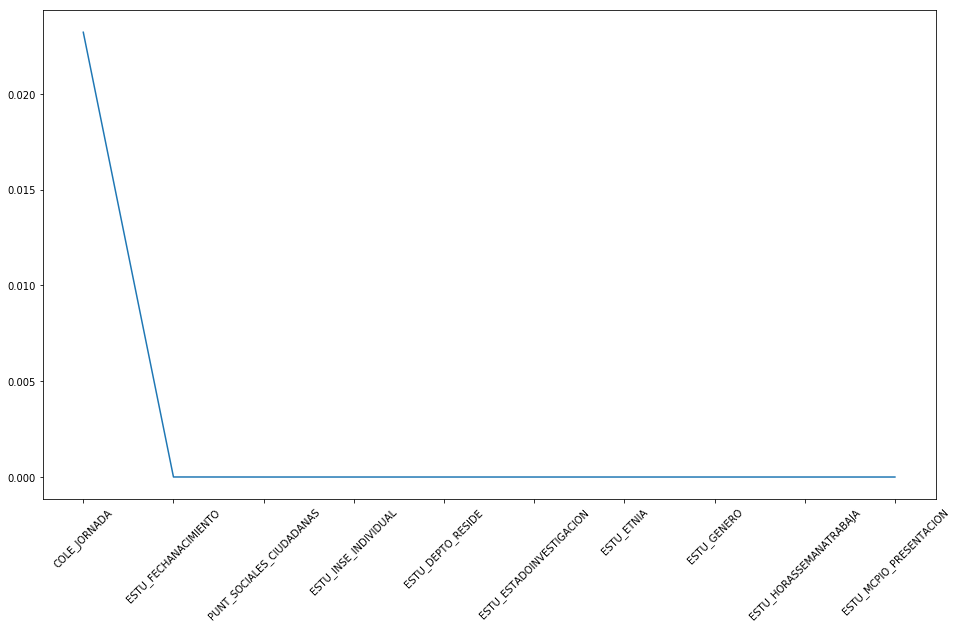

In [39]:
col = 'FAMI_TIENEINTERNET'

# icfes[col].describe(include='all')

# icfes[col].value_counts(dropna=False).sort_index()

plt.figure(figsize=(16, 9))

#icfes[col].value_counts(dropna=False).plot.bar()

null = icfes.isnull().sum() /icfes.shape[0]
null = null.sort_values(ascending=False)
plt.plot(null.iloc[:10])
plt.xticks(rotation=45)
plt.show()

In [40]:
import sklearn.decomposition
from sklearn_pandas import DataFrameMapper
import numpy as np


numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_icfes = icfes.select_dtypes(include=numerics)

numeric_icfes.describe()

numeric_icfes.isnull().sum()

DESEMP_C_NATURALES               0
DESEMP_LECTURA_CRITICA           0
DESEMP_MATEMATICAS               0
DESEMP_SOCIALES_CIUDADANAS       0
ESTU_INSE_INDIVIDUAL             0
ESTU_NSE_ESTABLECIMIENTO         0
PERCENTIL_C_NATURALES            0
PERCENTIL_GLOBAL                 0
PERCENTIL_INGLES                 0
PERCENTIL_LECTURA_CRITICA        0
PERCENTIL_MATEMATICAS            0
PERCENTIL_SOCIALES_CIUDADANAS    0
PERIODO                          0
PUNT_C_NATURALES                 0
PUNT_GLOBAL                      0
PUNT_INGLES                      0
PUNT_LECTURA_CRITICA             0
PUNT_MATEMATICAS                 0
PUNT_SOCIALES_CIUDADANAS         0
dtype: int64

In [60]:
# PCA

print(numeric_icfes.columns.shape)

pca_mapper = DataFrameMapper([
    (['DESEMP_C_NATURALES', 'PERCENTIL_C_NATURALES', 'PUNT_C_NATURALES'], 
     [sklearn.preprocessing.StandardScaler(), 
      sklearn.decomposition.PCA(n_components=2)])
    ], df_out=True)

np.round(pca_mapper.fit_transform(numeric_icfes.copy()), 2).head()

(19,)


/home/juan/Programas/Miniconda3/envs/dm/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,DESEMP_C_NATURALES_PERCENTIL_C_NATURALES_PUNT_C_NATURALES_0,DESEMP_C_NATURALES_PERCENTIL_C_NATURALES_PUNT_C_NATURALES_1
0,-2.82,-0.09
1,1.91,-0.02
3,3.31,0.67
4,-0.45,-0.04
5,3.48,0.56


In [61]:
icfes.to_csv("./data/icfes_preprocessing.csv", index=False, encoding="utf-8")